# Import Libraries

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle
import warnings
warnings.filterwarnings('ignore')


# Import Data

In [115]:
df = pd.read_csv(r'C:\Users\Taqwa\OneDrive\Desktop\Assignment 2\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#EDA

In [116]:
df.shape

(768, 9)

In [117]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [118]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [119]:
df.duplicated().sum()

np.int64(0)

In [120]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [121]:
correlation = df.corr()['Outcome'].abs()
correlation

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [122]:
#The code checks the frequency and unique values of each column in the dataset `df`, helping to identify data distribution and issues.
for col in df.columns:
    print(f"Column: {col}")
    print("Unique values:", df[col].nunique())
    print(df[col].value_counts())
    print("------------")


Column: Pregnancies
Unique values: 17
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64
------------
Column: Glucose
Unique values: 136
Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64
------------
Column: BloodPressure
Unique values: 47
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count,

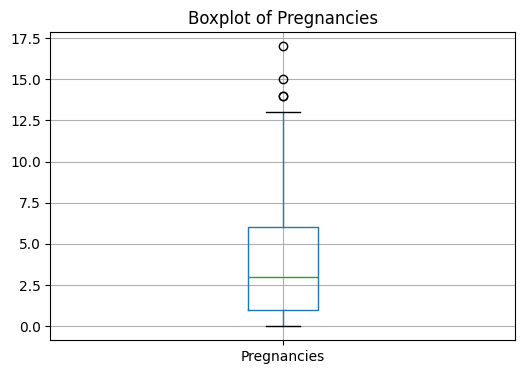

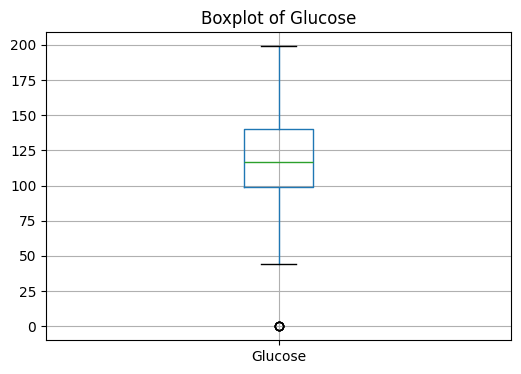

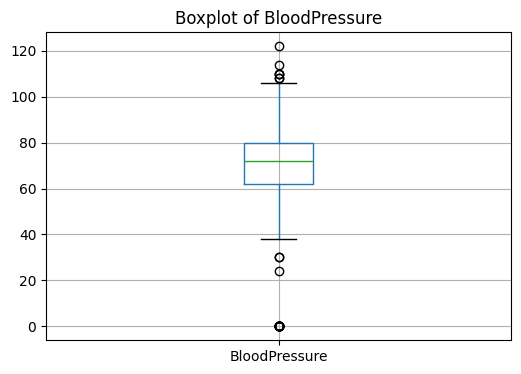

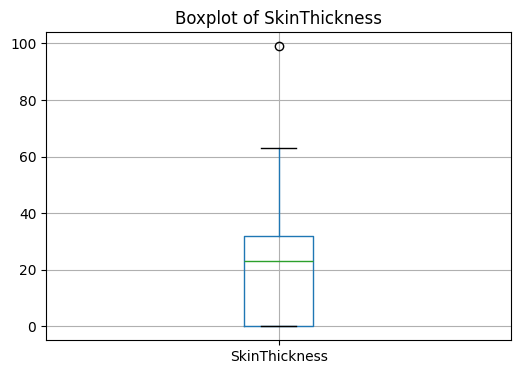

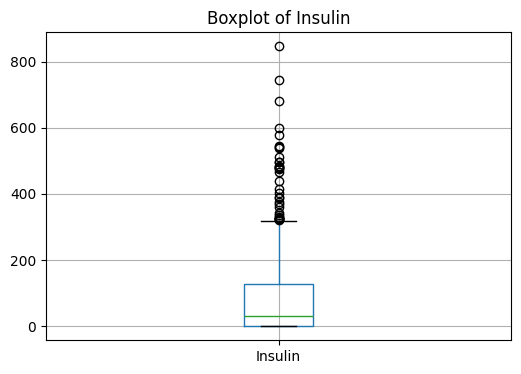

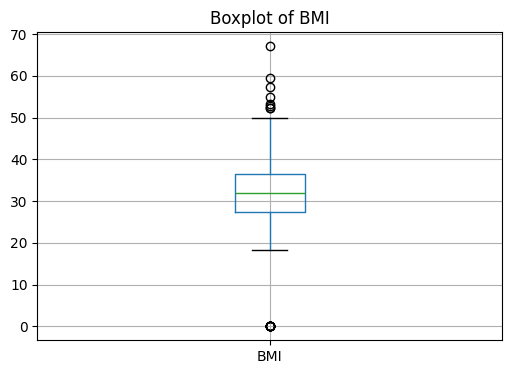

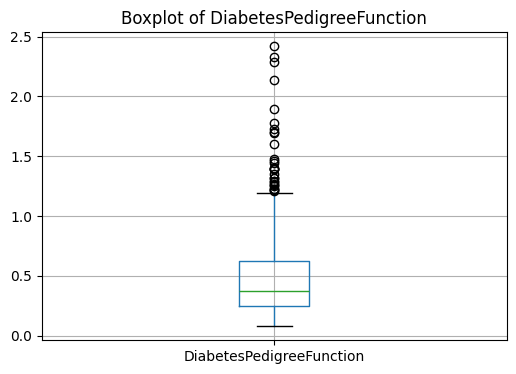

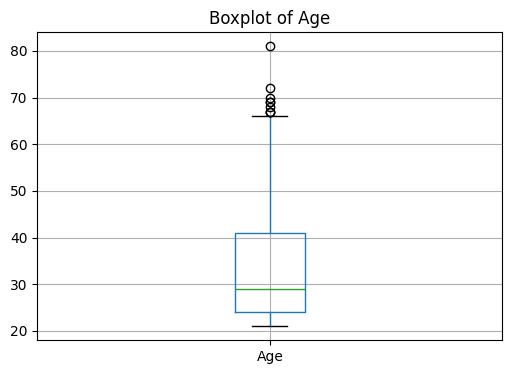

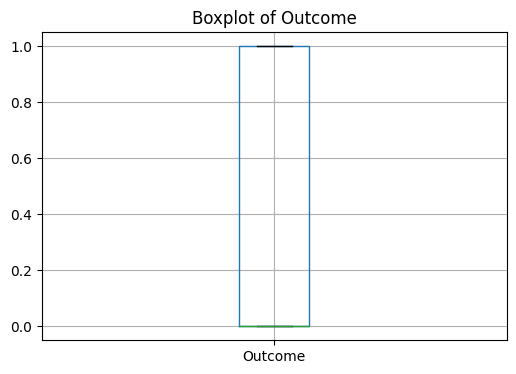

In [123]:
#boxplot of each column before Data Preprocessing
for column in df.columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

# Data Cleaning & Preprocessing

In [124]:
#The code replaces rows with `Glucose` values of 0 with the median `Glucose` value, addressing potential data issues.
print(df["Glucose"].value_counts()[0])
zero_glucose_rows = df[df["Glucose"] == 0]
print(zero_glucose_rows)
glucose_median = df["Glucose"].median()
df["Glucose"] = df["Glucose"].replace(0, glucose_median)

5
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1  


In [125]:
#The code replaces rows with `BloodPressure` values of 0 with the median `BloodPressure` value, addressing potential data issues.
print(df["BloodPressure"].value_counts()[0])
zero_BloodPressure_rows = df[df["BloodPressure"] == 0]
print(zero_BloodPressure_rows)
BloodPressure_median = df["BloodPressure"].median()
df["BloodPressure"] = df["BloodPressure"].replace(0, BloodPressure_median)

35
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115              0              0        0  35.3   
15             7      100              0              0        0  30.0   
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
78             0      131              0              0        0  43.2   
81             2       74              0              0        0   0.0   
172            2       87              0             23        0  28.9   
193           11      135              0              0        0  52.3   
222            7      119              0              0        0  25.2   
261            3      141              0              0        0  30.0   
266            0      138              0              0        0  36.3   
269            2      146              0              0        0  27.5   
300            0      167          

In [126]:
#The column `SkinThickness` is dropped due to its weak correlation with the target variable or other features, which means it doesn't contribute much to the model's performance.
df_cleaned = df.drop(columns='SkinThickness', axis=1, inplace=True)

In [127]:
#The code replaces rows with `Insulin` values of 0 with the median `Insulin` value, addressing potential data issues.
zero_Insulin_rows = df[df["Insulin"] == 0]
Insulin_median = df["Insulin"].median()
df["Insulin"] = df["Insulin"].replace(0, Insulin_median)

# The code replaces `Insulin` values above the upper bound (1.5 * IQR) with the upper bound to handle outliers.
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f"upper_bound: {upper_bound}")
df['Insulin'] = np.where(df['Insulin'] > upper_bound, upper_bound, df['Insulin'])

upper_bound: 272.375


In [128]:
#The code replaces rows with `BMI` values of 0 with the median `BMI` value, addressing potential data issues.
zero_BMI_rows = df[df["BMI"] == 0]
BMI_median = df["BMI"].median()
df["BMI"] = df["BMI"].replace(0, BMI_median)

# The code replaces `BMI` values above the upper bound (1.5 * IQR) with the upper bound to handle outliers.
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(f"upper_bound: {upper_bound}")
print(f"lower_bound: {lower_bound}")
df['BMI'] = np.where(df['BMI'] > upper_bound, upper_bound, df['BMI'])
df['BMI'] = np.where(df['BMI'] < lower_bound, lower_bound, df['BMI'])

upper_bound: 50.25
lower_bound: 13.849999999999998


In [129]:
# The code replaces `DiabetesPedigreeFunction` values above the upper bound (1.5 * IQR) with the upper bound to handle outliers.
Q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(f"upper_bound: {upper_bound}")
print(f"lower_bound: {lower_bound}")
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction'] > upper_bound, upper_bound, df['DiabetesPedigreeFunction'])
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction'] < lower_bound, lower_bound, df['DiabetesPedigreeFunction'])

upper_bound: 1.2
lower_bound: -0.32999999999999996


In [130]:
# The code replaces `BloodPressure` values above the upper bound (1.5 * IQR) with the upper bound to handle outliers.
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(f"upper_bound: {upper_bound}")
print(f"lower_bound: {lower_bound}")
df['BloodPressure'] = np.where(df['BloodPressure'] > upper_bound, upper_bound, df['BloodPressure'])
df['BloodPressure'] = np.where(df['BloodPressure'] < lower_bound, lower_bound, df['BloodPressure'])

upper_bound: 104.0
lower_bound: 40.0


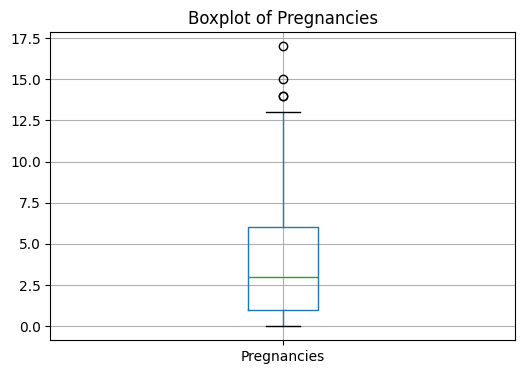

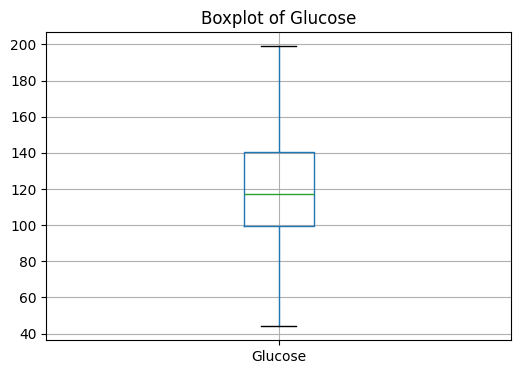

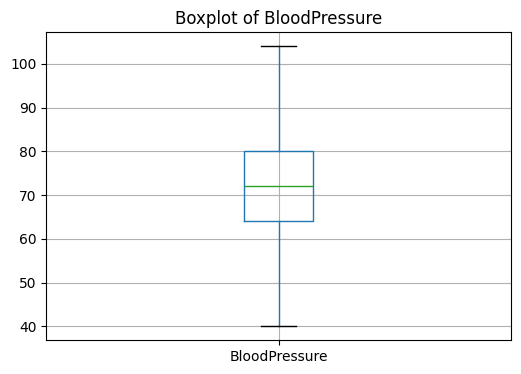

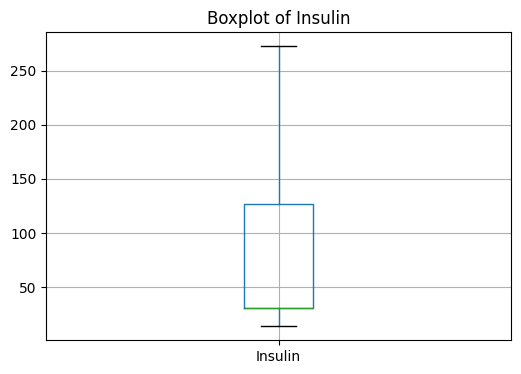

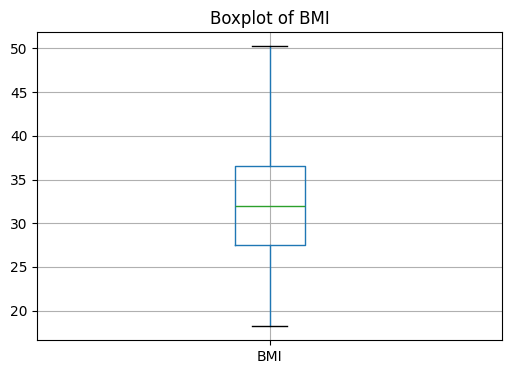

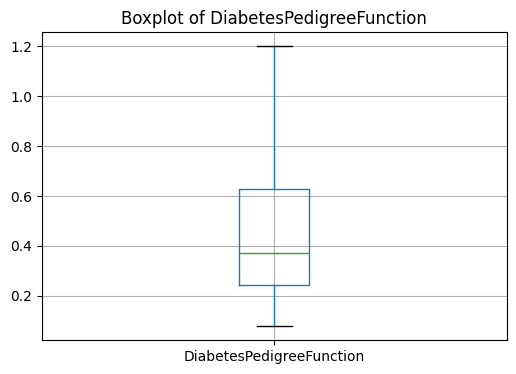

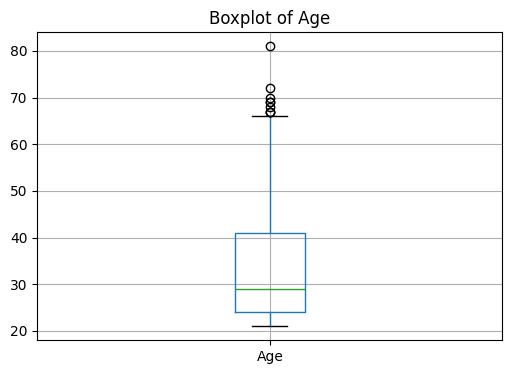

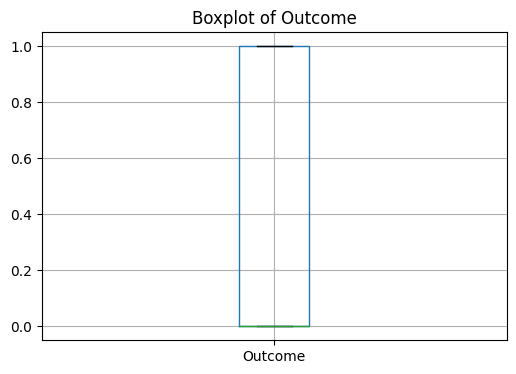

In [131]:
#Boxplot after Data Preprocessing
for column in df.columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

# Model Building

In [103]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

### RandomForest

In [132]:
n = 100
random_state = []
Forest_accuracy = []

for i in range(n):
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    random_state.append(i)
    smote = SMOTE(random_state=i)
    X_res, y_res = smote.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=i, stratify=y_res)
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    Forest_accuracy.append(accuracy_score(y_test, y_pred))

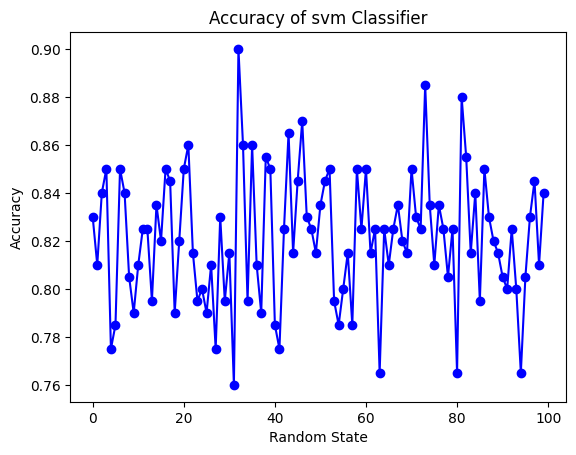

In [133]:
# plot the accuracy of svm Classifier
plt.plot(random_state, Forest_accuracy, marker='o', linestyle='-', color='b')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.title('Accuracy of svm Classifier')
plt.show()

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [ 100, 200],  
    'max_features': ['auto', 'sqrt'], 
    'max_depth': [None, 10, 50,],
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2], 
    'bootstrap': [True, False],  
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
print('Accuracy of SVM Classifier:', accuracy_score(y_test, y_pred))

# Print the best hyperparameters
print(grid_search.best_params_) 

# Print the best model
best_model = grid_search.best_estimator_
print(best_model)

# Predict and evaluate
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Accuracy of SVM Classifier: 0.86
{'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(bootstrap=False, max_depth=50)
Accuracy: 0.86
[[81 19]
 [ 9 91]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       100
           1       0.83      0.91      0.87       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



### Support Vector Machines

In [104]:
n = 100
random_state = []
svm_accuracy = []

for i in range(n):
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    random_state.append(i)
    smote = SMOTE(random_state=i)
    X_res, y_res = smote.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=i, stratify=y_res)
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    svm_accuracy.append(accuracy_score(y_test, y_pred))

# see the average accuracy of SVM Classifier
print('Average accuracy of SVM Classifier:', np.mean(svm_accuracy))

Average accuracy of SVM Classifier: 0.7889


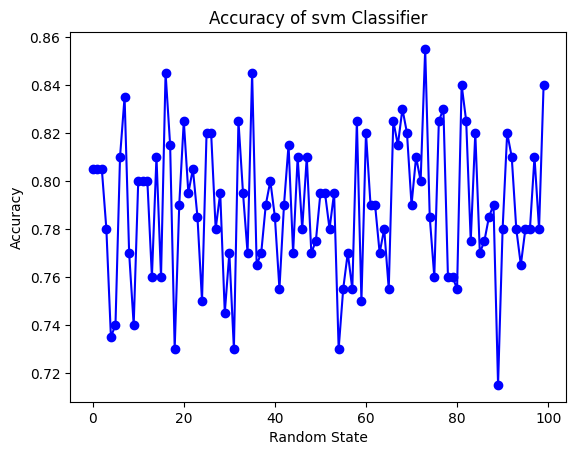

In [105]:
# plot the accuracy of svm Classifier
plt.plot(random_state, svm_accuracy, marker='o', linestyle='-', color='b')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.title('Accuracy of svm Classifier')
plt.show()

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define an expanded hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],  
    'kernel': ['rbf', 'linear'],  
    'coef0': [0, 0.5, 1, 10], 
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
print('Accuracy of SVM Classifier:', accuracy_score(y_test, y_pred))

# Print the best hyperparameters
print(grid_search.best_params_) 

# Print the best model
best_model = grid_search.best_estimator_
print(best_model)

# Predict and evaluate
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Accuracy of SVM Classifier: 0.835
{'C': 10, 'coef0': 0, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, coef0=0, gamma=1)
Accuracy: 0.835
[[75 25]
 [ 8 92]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       100
           1       0.79      0.92      0.85       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



# Save the best model

In [136]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the trained RandomForest model
joblib.dump(random_forest, 'diabetes_model.pkl')


['diabetes_model.pkl']